## Section 2: Shopper Analytics - Customer Segmentation & Category Associations

- Dataset

#### Transaction Level Data 

<table align = "left">
    <tr>
        <th>sales_receipt</th>
        <th>sales_customer</th>
        <th>sales_product</th>
        <th>sales_date_id</th>
    </tr>
    <tr>
        <th>Receipt ID</th>
        <th>Customer ID</th>
        <th>Product ID</th>
        <th>Date ID</th>
    </tr>
</table>

#### Product Master Data

<table align = "left">
    <tr>
        <th>product_id</th>
        <th>product_lvl1_cat_desc</th>
        <th>product_lvl2_cat_desc</th>
    </tr>
    <tr >
        <th>Product ID</th>
        <th>Category Level 1</th>
        <th>Category Level 2</th>
    </tr>
</table>



#### Requirement

1. Arrange customers into mutually exclusive groups and describe the customers clusters. Code libraries are allowed for this section of the code

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


In [3]:
%matplotlib inline

In [4]:
df1 = pd.DataFrame(pd.read_csv('s2_transaction_data.csv'))
df2 = pd.DataFrame(pd.read_csv('s2_product_master.csv'))
df1 = df1.drop(columns = df1.columns[0])
# change dtype
df1.loc[:, 'sales_date_id'] = pd.to_datetime(df1.loc[:,'sales_date_id'], format = '%Y%m%d').copy()
df2 = df2.drop(columns = df2.columns[0])
# join
maindf1 = df1.join(df2.set_index('product_id'), how = 'inner',on='sales_product')

In [5]:
maindf1

,sales_receipt,sales_customer,sales_product,sales_date_id,product_lvl1_cat_desc,product_lvl2_cat_desc
0,203722145,569,30763,2018-01-02,FoodCommodity,JarredFood
5519,203960181,358,30763,2018-02-01,FoodCommodity,JarredFood
9015,204115623,358,30763,2018-02-22,FoodCommodity,JarredFood
10543,204158417,569,30763,2018-02-28,FoodCommodity,JarredFood
10832,204168017,358,30763,2018-03-01,FoodCommodity,JarredFood
...,...,...,...,...,...,...
49943,205774052,358,232498,2018-09-14,BabyAndChild,BabyPersonal
49960,205774491,11,121742,2018-09-14,Frozen,Desserts
49961,205774491,11,121743,2018-09-14,Frozen,Desserts
49977,205776025,396,176415,2018-09-14,FoodCommodity,CookingSaucesAndKits


In [8]:
maindf2 = maindf1.set_index(['sales_customer','sales_receipt']).sort_index()

In [11]:
maindf2

sales_product sales_date_id  \
sales_customer sales_receipt                                
1              204699298              47046    2018-05-09   
               204699298             152754    2018-05-09   
               204699298              58926    2018-05-09   
               204699298              84579    2018-05-09   
               204699298              24438    2018-05-09   
...                                     ...           ...   
728            204605591              19516    2018-04-27   
               204605591              70397    2018-04-27   
               204605591              61730    2018-04-27   
               204800421              26315    2018-05-22   
               204800421              70397    2018-05-22   

                             product_lvl1_cat_desc product_lvl2_cat_desc  
sales_customer sales_receipt                                              
1              204699298                 Beverages         LongLifeJuice  
               204699298           DairyAndChilled        MilkButterEggs  
               204699298                 Beverages            SoftDrinks  
               204699298                 Beverages            SoftDrinks  
               204699298                    Frozen      ConvenienceFoods  
...                                            ...                   ...  
728            204605591                 Household              Cleaning  
               204605591                 Beverages                 Water  
               204605591                 Household           Dishwashing  
               204800421                 Beverages                 Water  
               204800421                 Beverages                 Water  

[50000 rows x 4 columns]

In [14]:
maindf1

,sales_receipt,sales_customer,sales_product,sales_date_id,product_lvl1_cat_desc,product_lvl2_cat_desc
0,203722145,569,30763,2018-01-02,FoodCommodity,JarredFood
5519,203960181,358,30763,2018-02-01,FoodCommodity,JarredFood
9015,204115623,358,30763,2018-02-22,FoodCommodity,JarredFood
10543,204158417,569,30763,2018-02-28,FoodCommodity,JarredFood
10832,204168017,358,30763,2018-03-01,FoodCommodity,JarredFood
...,...,...,...,...,...,...
49943,205774052,358,232498,2018-09-14,BabyAndChild,BabyPersonal
49960,205774491,11,121742,2018-09-14,Frozen,Desserts
49961,205774491,11,121743,2018-09-14,Frozen,Desserts
49977,205776025,396,176415,2018-09-14,FoodCommodity,CookingSaucesAndKits


In [16]:
maindf1 = maindf1.loc[:, ['sales_customer', 'sales_receipt','sales_product']]

In [17]:
maindf1

,sales_customer,sales_receipt,sales_product
0,569,203722145,30763
5519,358,203960181,30763
9015,358,204115623,30763
10543,569,204158417,30763
10832,358,204168017,30763
...,...,...,...
49943,358,205774052,232498
49960,11,205774491,121742
49961,11,205774491,121743
49977,396,205776025,176415


In [20]:
maindf2 = maindf1.groupby(by='sales_customer').agg({'sales_receipt':'nunique', 'sales_product':'count'}).rename(
    columns = {'sales_receipt':'frequency_visits','sales_product': 'total_purchase'})

In [21]:
maindf2

,frequency_visits,total_purchase
sales_customer,,
1,1,24
2,3,14
6,17,234
7,8,227
8,5,124
...,...,...
719,3,18
720,2,11
722,1,5


In [85]:
data_matrix = np.array(maindf2.values)

In [86]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection

In [89]:
# scale the matrix
scaler = preprocessing.MinMaxScaler(feature_range = (-1,1))
scaler.fit(data_matrix)
data_matrix = scaler.transform(data_matrix)

For n_clusters = 2 The average silhouette_score is : 0.6902491123404015
For n_clusters = 3 The average silhouette_score is : 0.603927474433539
For n_clusters = 4 The average silhouette_score is : 0.5400321772340928
For n_clusters = 5 The average silhouette_score is : 0.5366292105383043
For n_clusters = 6 The average silhouette_score is : 0.5250436187312484
For n_clusters = 7 The average silhouette_score is : 0.5078094010606773
For n_clusters = 8 The average silhouette_score is : 0.5108778927636577
For n_clusters = 9 The average silhouette_score is : 0.5009816035351163


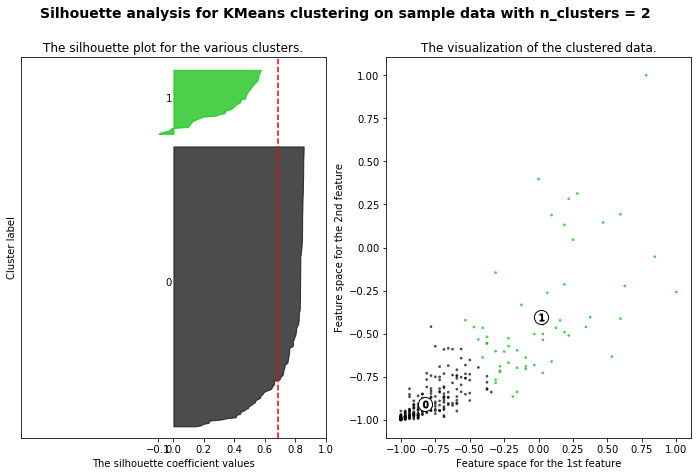

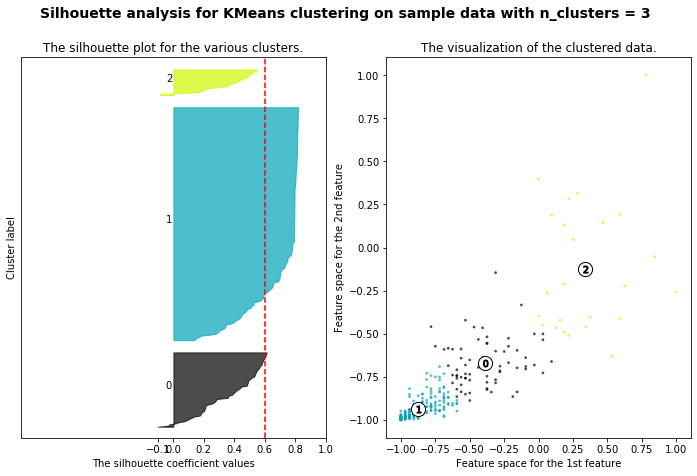

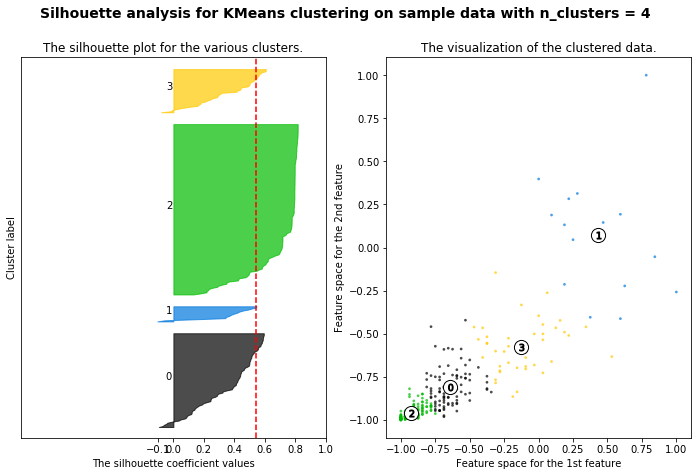

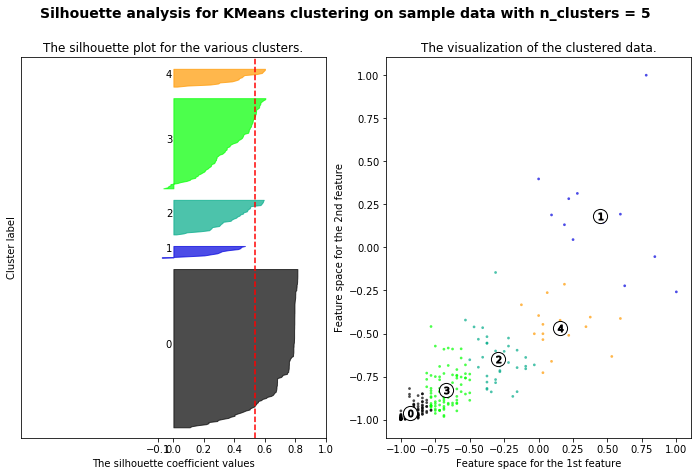

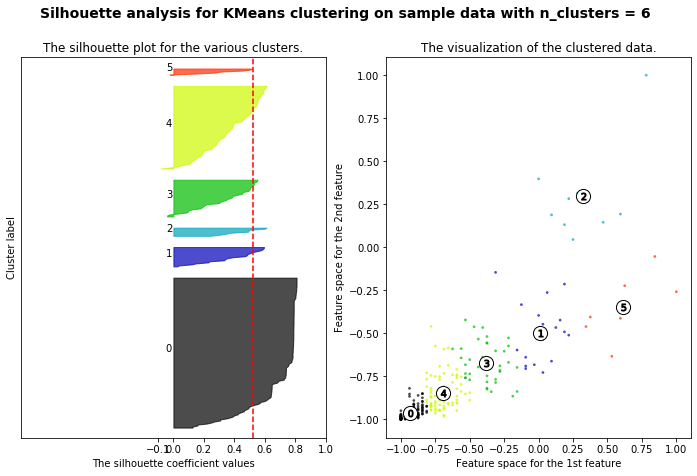

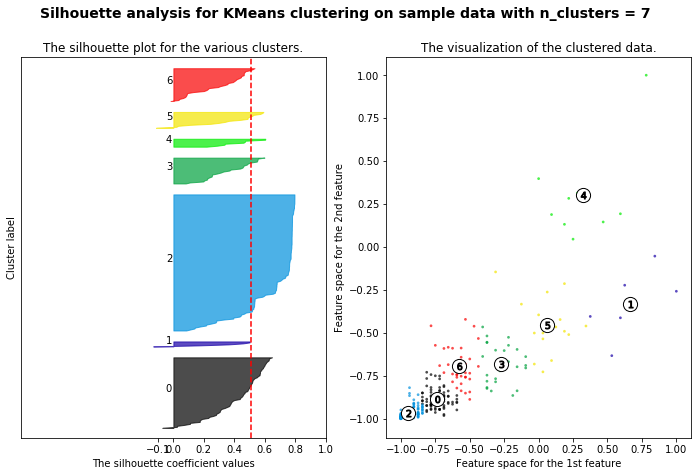

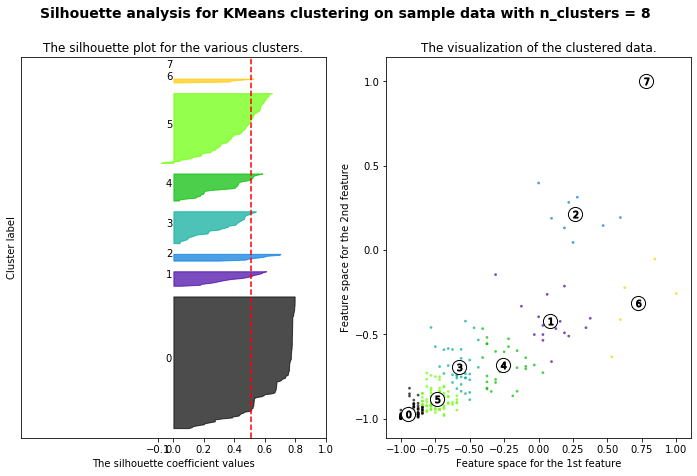

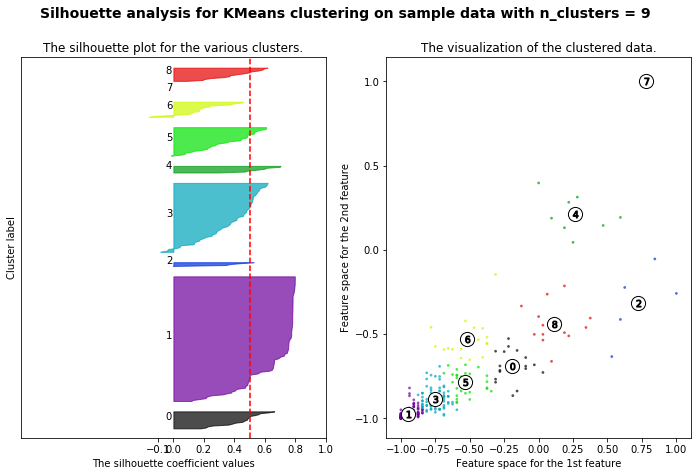

In [90]:
# run cluster
for n_clusters in range(2,10):
    # fit
    clusterer = KMeans(init='k-means++', n_clusters=n_clusters, n_init = 30, random_state=10) # set seed
    cluster_labels = clusterer.fit_predict(data_matrix)
    silhouette_avg = silhouette_score(data_matrix, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)    
    
    sample_silhouette_values = silhouette_samples(data_matrix, cluster_labels)
    
    #plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 7)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(data_matrix) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_matrix[:, 0], data_matrix[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    


Based on the silhouette score, we choose cluster, n_cluster = 4 as each of the cluster has higher than average silhouette score

For n_clusters = 4 The average silhouette_score is : 0.5400321772340928


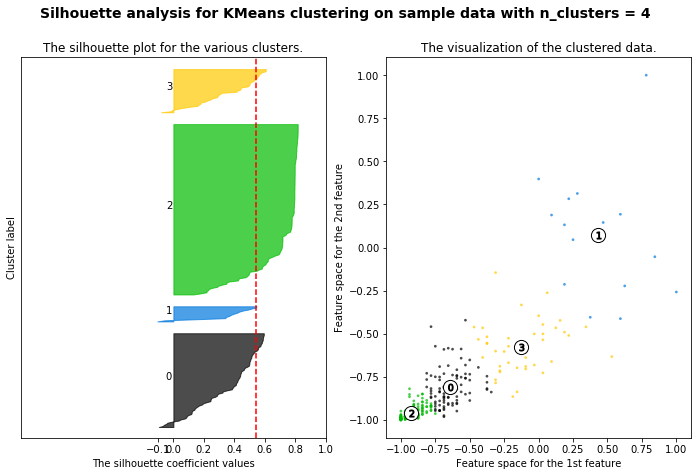

In [112]:
for n_clusters in range(4,5):
    # fit
    clusterer = KMeans(init='k-means++', n_clusters=n_clusters, n_init = 30, random_state=10) # set seed
    cluster_labels = clusterer.fit_predict(data_matrix)
    silhouette_avg = silhouette_score(data_matrix, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)    
    
    sample_silhouette_values = silhouette_samples(data_matrix, cluster_labels)
    
    #plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 7)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(data_matrix) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_matrix[:, 0], data_matrix[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    


In [113]:
finaldf = pd.DataFrame(zip(list(maindf2.index),list(maindf2['frequency_visits']),list(maindf2['total_purchase']),
                list(cluster_labels)), columns=['sales_customer','frequency_visits','total_purchase','label'])

In [114]:
finaldf

,sales_customer,frequency_visits,total_purchase,label
0,1,1,24,2
1,2,3,14,2
2,6,17,234,0
3,7,8,227,0
4,8,5,124,2
...,...,...,...,...
298,719,3,18,2
299,720,2,11,2
300,722,1,5,2
301,724,7,207,0


### Conclusion

From the plot, we can see that customers in label 2 correspond to (low purchase,low frequency shopper), 0 is (mid purchase,mid frequency shopper), 3 is (high purchase,high frequency shopper) and finally 3 is (very high purchase,very high frequency shopper)

#### Requirement

2. Identify 1-1 product category association rules for each cluster if_bought_this_category -> likely_to_buy_this_category and evaluate them based on relevant metrics. Code libraries used should be limited to linear algebra and dataframe manipulation

In [117]:
maindf3 = df1.join(df2.set_index('product_id'), how = 'inner',on='sales_product')

In [118]:
maindf3

,sales_receipt,sales_customer,sales_product,sales_date_id,product_lvl1_cat_desc,product_lvl2_cat_desc
0,203722145,569,30763,2018-01-02,FoodCommodity,JarredFood
5519,203960181,358,30763,2018-02-01,FoodCommodity,JarredFood
9015,204115623,358,30763,2018-02-22,FoodCommodity,JarredFood
10543,204158417,569,30763,2018-02-28,FoodCommodity,JarredFood
10832,204168017,358,30763,2018-03-01,FoodCommodity,JarredFood
...,...,...,...,...,...,...
49943,205774052,358,232498,2018-09-14,BabyAndChild,BabyPersonal
49960,205774491,11,121742,2018-09-14,Frozen,Desserts
49961,205774491,11,121743,2018-09-14,Frozen,Desserts
49977,205776025,396,176415,2018-09-14,FoodCommodity,CookingSaucesAndKits


In [120]:
maindf3.set_index('sales_customer').join(finaldf.set_index('sales_customer'), how = 'inner', on='sales_customer')

,sales_receipt,sales_product,sales_date_id,product_lvl1_cat_desc,product_lvl2_cat_desc,frequency_visits,total_purchase,label
sales_customer,,,,,,,,
569,203722145,30763,2018-01-02,FoodCommodity,JarredFood,20,320,3
569,204158417,30763,2018-02-28,FoodCommodity,JarredFood,20,320,3
569,204370097,30763,2018-03-28,FoodCommodity,JarredFood,20,320,3
569,204875526,30763,2018-05-31,FoodCommodity,JarredFood,20,320,3
569,205427726,30763,2018-08-07,FoodCommodity,JarredFood,20,320,3
...,...,...,...,...,...,...,...,...
679,205198999,97212,2018-07-11,Beverages,Water,1,1,2
227,204457799,94997,2018-04-09,Alcohol,Wine,2,2,2
227,204687758,6928,2018-05-08,Alcohol,Spirits,2,2,2
